# Centrality Networks

In [88]:

#http://www.sociopatterns.org/datasets/contacts-in-a-workplace/#http:/ 
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/kylegilde/D620-Web-Analytics-Group-Project/master/project-01%20Measures%20of%20Centrality/tij_InVS.dat',
                 sep=' ',
                 header=None,
                 names=['t', 'i', 'j']).drop('t', axis=1)

g = nx.from_pandas_edgelist(df, 'i', 'j')


attributes = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2016/06/metadata_InVS13.txt',
                  sep='\t',
                  header=None,
                  names=['node', 'dept'])

attr_dict = dict(zip(attributes.node, attributes.dept))
#source: https://stackoverflow.com/questions/18012505/python-pandas-dataframe-columns-convert-to-dict-key-and-value/18013682
nx.set_node_attributes(g, attr_dict, 'dept')



Let's visualize the networks


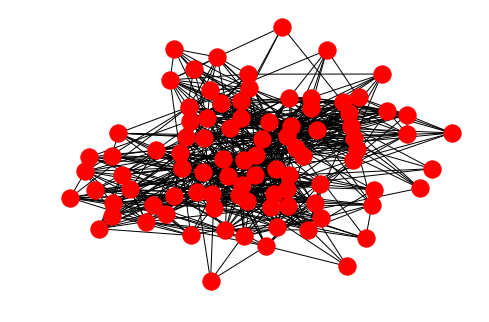

In [67]:
nx.draw(g)


# Degree Centrality

Look at the number of nodes in this network


In [3]:
len(g)

92

It is not a huge network
Degree is returned as a set of name-value pairs linking node names to the degree value.

Looking at node 95 we see it has 32 degrees. THis means it has 32 edge links

In [89]:
deg=nx.degree(g) 
deg[95]

32

Let's find the minimum and maximum number of degrees that exist in our graph for each node by creating a sorted list of all nodes and the degrees

In [90]:
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1])
deg_list
 

[(272, 4),
 (210, 4),
 (791, 4),
 (87, 4),
 (938, 5),
 (513, 6),
 (242, 6),
 (511, 6),
 (15, 7),
 (786, 7),
 (185, 7),
 (213, 7),
 (66, 8),
 (784, 8),
 (845, 9),
 (118, 9),
 (494, 9),
 (492, 10),
 (105, 10),
 (987, 10),
 (743, 10),
 (122, 11),
 (601, 11),
 (603, 11),
 (499, 11),
 (164, 12),
 (35, 12),
 (709, 12),
 (179, 13),
 (481, 13),
 (48, 13),
 (101, 13),
 (132, 14),
 (21, 15),
 (448, 15),
 (765, 15),
 (771, 15),
 (819, 15),
 (172, 15),
 (285, 15),
 (939, 15),
 (113, 15),
 (240, 15),
 (268, 15),
 (273, 15),
 (779, 15),
 (181, 16),
 (253, 16),
 (17, 16),
 (533, 16),
 (196, 17),
 (205, 17),
 (431, 17),
 (335, 17),
 (154, 17),
 (131, 17),
 (751, 17),
 (153, 18),
 (271, 18),
 (762, 18),
 (209, 18),
 (211, 18),
 (778, 19),
 (275, 19),
 (116, 19),
 (102, 19),
 (255, 20),
 (79, 21),
 (56, 21),
 (194, 21),
 (496, 21),
 (50, 21),
 (119, 21),
 (184, 21),
 (150, 22),
 (120, 22),
 (29, 24),
 (267, 25),
 (39, 25),
 (222, 25),
 (265, 25),
 (826, 26),
 (123, 26),
 (875, 26),
 (662, 26),
 (223, 28

The node with the smallest degree centrality is node 272
while the largest is node 804 with 44 edge limks directly connected to it


We can visualize the subgraph of the smallest degree node 272

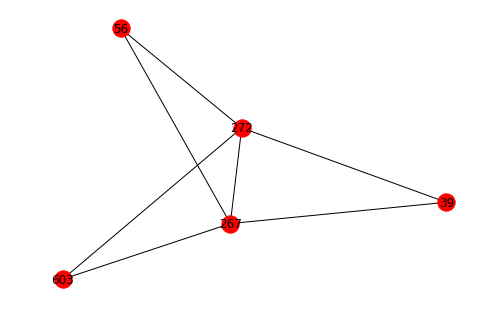

In [43]:


min_deg_node=deg_list[0][0]
list_dn=list(g[min_deg_node])
list_dn.append(min_deg_node)
g_sub=g.subgraph(list_dn)
nx.draw(g_sub, with_labels=True)

Let's visualize the node with the maximum degree of centrality


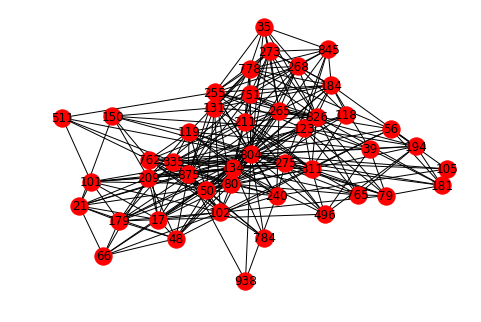

In [44]:
#for the maximum node
max_deg_node=deg_list[len(g)-1][0]
list_dn=list(g[max_deg_node])
list_dn.append(max_deg_node)
g_sub=g.subgraph(list_dn)
nx.draw(g_sub, with_labels=True)

In [91]:
#List top 10 most influential nodes 
deg_list=list(deg)
deg_list.sort(key=lambda no_edges:no_edges[1], reverse=True)
deg_list[0:10]

[(804, 44),
 (311, 38),
 (95, 32),
 (80, 31),
 (134, 30),
 (223, 28),
 (63, 28),
 (826, 26),
 (123, 26),
 (875, 26)]

Let's analyze which department has the highest number of degrees in total


C:\Users\Mezu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


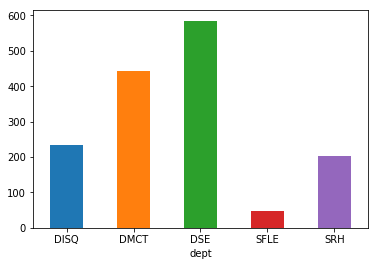

In [129]:


#g_node_attr=nx.get_node_attributes(g,'dept')

#Get dictionary of all nodes with their degrees
deg_dict=dict(deg_list)
attr_dict
deg_dict
deg_dict.items()
deg_df=pd.DataFrame(deg_list, columns=['node','degree'])
attributes
deg_dept_df=pd.merge(deg_df,
                 attributes,
                 on='node')
deg_dept_df
agg_df=deg_dept_df.groupby(['dept'])['degree'].agg({'summ':'sum'})
agg_df


deg_dept_df.groupby(['dept'])['degree'].agg('sum').plot.bar(x='dept', y='summ', rot=0)


As we can see the DSE department has the highest number of degree centrality

# Closeness Centrality

In closeness centrality we calculate with node has the average shortest path to any node on the network

In [136]:



g_close=nx.closeness_centrality(g)
g_close

g_close_sorted = sorted(g_close.items(), key=lambda kv: kv[1], reverse=True)
g_close_sorted


g_close_sorted_df=pd.DataFrame(g_close_sorted, columns=['node','closeness'])
g_close_sorted_df
g_close_dept_df=pd.merge(g_close_sorted_df,
                 attributes,
                 on='node')
g_close_dept_df
avg_close_df=g_close_dept_df.groupby(['dept'])['closeness'].agg({'Avg':'mean'})


avg_close_df.sort_values(by=['Avg'], ascending=False)


C:\Users\Mezu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,Avg
dept,
DSE,0.519457
DMCT,0.518303
SFLE,0.513206
DISQ,0.505178
SRH,0.500198


As we can see node 804 is the node closest to every other node
After taking the average of the closeness of each node, we can see the department that is most close to other depts in the network is DSE